<a href="https://colab.research.google.com/github/mrigankapaul-dhubri/TXTA_Praxis_term2/blob/main/TXTA_Session3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving bbc-fulltext.zip to bbc-fulltext.zip


In [2]:
!unzip /content/bbc-fulltext.zip

Archive:  /content/bbc-fulltext.zip
   creating: bbc/
   creating: bbc/business/
  inflating: bbc/business/001.txt    
  inflating: bbc/business/002.txt    
  inflating: bbc/business/003.txt    
  inflating: bbc/business/004.txt    
  inflating: bbc/business/005.txt    
  inflating: bbc/business/006.txt    
  inflating: bbc/business/007.txt    
  inflating: bbc/business/008.txt    
  inflating: bbc/business/009.txt    
  inflating: bbc/business/010.txt    
  inflating: bbc/business/011.txt    
  inflating: bbc/business/012.txt    
  inflating: bbc/business/013.txt    
  inflating: bbc/business/014.txt    
  inflating: bbc/business/015.txt    
  inflating: bbc/business/016.txt    
  inflating: bbc/business/017.txt    
  inflating: bbc/business/018.txt    
  inflating: bbc/business/019.txt    
  inflating: bbc/business/020.txt    
  inflating: bbc/business/021.txt    
  inflating: bbc/business/022.txt    
  inflating: bbc/business/023.txt    
  inflating: bbc/business/024.txt    
  infla

In [3]:
import os, re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
from wordcloud import WordCloud, STOPWORDS

In [5]:
with open("/content/bbc/business/001.txt", "r") as file:
  f = file.read()
f


'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sig

In [6]:
global_path = "/content/bbc/"
file_dicts = {"business": [],"entertainment": [], "politics": [], "sport": [], "tech": []}
for folder in ["business", "entertainment", "politics", "sport", "tech"]:
  folder_path = global_path + folder + '/'
  files = os.listdir(folder_path)
  files = sorted(files)
  for file in files:
    file_path = folder_path + file
    with open(file_path, "r") as f:
      try:
        file_dicts[folder].append(f.read())
      except:
        print(file_path)
        continue

/content/bbc/sport/199.txt


In [7]:
file_dicts['business'][10]

"Ask Jeeves tips online ad revival\n\nAsk Jeeves has become the third leading online search firm this week to thank a revival in internet advertising for improving fortunes.\n\nThe firm's revenue nearly tripled in the fourth quarter of 2004, exceeding $86m (£46m). Ask Jeeves, once among the best-known names on the web, is now a relatively modest player. Its $17m profit for the quarter was dwarfed by the $204m announced by rival Google earlier in the week. During the same quarter, Yahoo earned $187m, again tipping a resurgence in online advertising.\n\nThe trend has taken hold relatively quickly. Late last year, marketing company Doubleclick, one of the leading providers of online advertising, warned that some or all of its business would have to be put up for sale. But on Thursday, it announced that a sharp turnaround had brought about an unexpected increase in profits. Neither Ask Jeeves nor Doubleclick thrilled investors with their profit news, however. In both cases, their shares fe

In [8]:
re.search(".*(?=\\n\\n)",file_dicts['business'][10]).group()

'Ask Jeeves tips online ad revival'

In [28]:
business_news = file_dicts['business']
business_news

['Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to si

In [29]:
business_headings = [re.search("(?<=\\n\\n).*",x).group() for x in business_news]

In [30]:
business_news_only = [re.sub(business_headings[i], "", business_news[i]) for i in range(len(business_news))]

In [58]:
business_news_only

['Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to si

In [34]:
corpus = [re.sub("[^A-Za-z ]+","",x) for x in business_news_only]
corpus = [x.lower() for x in corpus]
corpus[0:5]

['ad sales boost time warner profitquarterly profits at us media giant timewarner jumped  to bn m for the three months to december from m yearearlierthe firm which is now one of the biggest investors in google benefited from sales of highspeed internet connections and higher advert sales timewarner said fourth quarter sales rose  to bn from bn its profits were buoyed by oneoff gains which offset a profit dip at warner bros and less users for aoltime warner said on friday that it now owns  of searchengine google but its own internet business aol had has mixed fortunes it lost  subscribers in the fourth quarter profits were lower than in the preceding three quarters however the company said aols underlying profit before exceptional items rose  on the back of stronger internet advertising revenues it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aols existing customers for highspeed broadband timewarner also has 

In [36]:
single_text_business_news = " ".join(corpus)
single_text_business_news

'ad sales boost time warner profitquarterly profits at us media giant timewarner jumped  to bn m for the three months to december from m yearearlierthe firm which is now one of the biggest investors in google benefited from sales of highspeed internet connections and higher advert sales timewarner said fourth quarter sales rose  to bn from bn its profits were buoyed by oneoff gains which offset a profit dip at warner bros and less users for aoltime warner said on friday that it now owns  of searchengine google but its own internet business aol had has mixed fortunes it lost  subscribers in the fourth quarter profits were lower than in the preceding three quarters however the company said aols underlying profit before exceptional items rose  on the back of stronger internet advertising revenues it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aols existing customers for highspeed broadband timewarner also has t

In [38]:
tokens = re.findall("\w+",single_text_business_news)
tokens

['ad',
 'sales',
 'boost',
 'time',
 'warner',
 'profitquarterly',
 'profits',
 'at',
 'us',
 'media',
 'giant',
 'timewarner',
 'jumped',
 'to',
 'bn',
 'm',
 'for',
 'the',
 'three',
 'months',
 'to',
 'december',
 'from',
 'm',
 'yearearlierthe',
 'firm',
 'which',
 'is',
 'now',
 'one',
 'of',
 'the',
 'biggest',
 'investors',
 'in',
 'google',
 'benefited',
 'from',
 'sales',
 'of',
 'highspeed',
 'internet',
 'connections',
 'and',
 'higher',
 'advert',
 'sales',
 'timewarner',
 'said',
 'fourth',
 'quarter',
 'sales',
 'rose',
 'to',
 'bn',
 'from',
 'bn',
 'its',
 'profits',
 'were',
 'buoyed',
 'by',
 'oneoff',
 'gains',
 'which',
 'offset',
 'a',
 'profit',
 'dip',
 'at',
 'warner',
 'bros',
 'and',
 'less',
 'users',
 'for',
 'aoltime',
 'warner',
 'said',
 'on',
 'friday',
 'that',
 'it',
 'now',
 'owns',
 'of',
 'searchengine',
 'google',
 'but',
 'its',
 'own',
 'internet',
 'business',
 'aol',
 'had',
 'has',
 'mixed',
 'fortunes',
 'it',
 'lost',
 'subscribers',
 'in',


In [40]:
tokens_no_stopwords = [x for x in tokens if x not in STOPWORDS]
tokens_no_stopwords[:20]

['ad',
 'sales',
 'boost',
 'time',
 'warner',
 'profitquarterly',
 'profits',
 'us',
 'media',
 'giant',
 'timewarner',
 'jumped',
 'bn',
 'm',
 'three',
 'months',
 'december',
 'm',
 'yearearlierthe',
 'firm']

In [41]:
wc = WordCloud(width = 800, height = 600, stopwords = STOPWORDS)
wc

In [42]:
import matplotlib.pyplot as plt

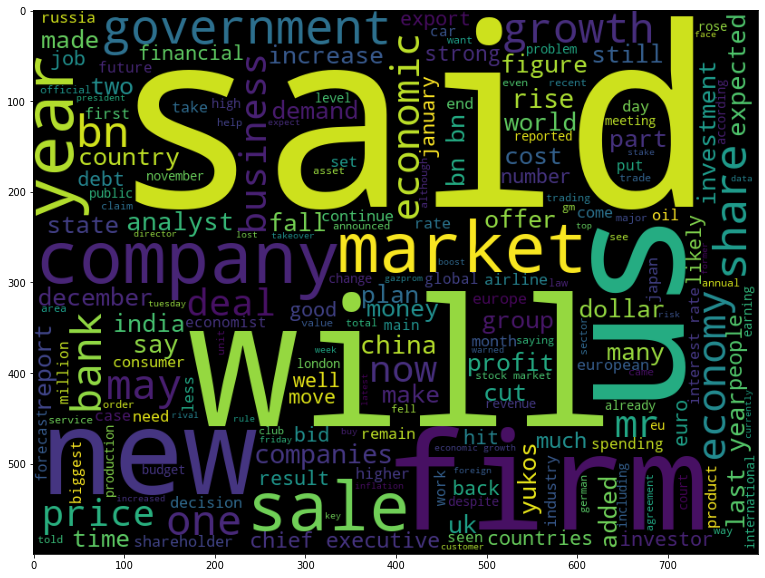

In [51]:
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_text(single_text_business_news))

In [52]:
from collections import Counter

In [53]:
C = Counter(tokens_no_stopwords)
C

Counter({'ad': 3,
         'sales': 283,
         'boost': 71,
         'time': 145,
         'warner': 3,
         'profitquarterly': 1,
         'profits': 119,
         'us': 672,
         'media': 20,
         'giant': 68,
         'timewarner': 6,
         'jumped': 18,
         'bn': 750,
         'm': 467,
         'three': 147,
         'months': 158,
         'december': 147,
         'yearearlierthe': 1,
         'firm': 270,
         'now': 220,
         'one': 230,
         'biggest': 125,
         'investors': 105,
         'google': 7,
         'benefited': 4,
         'highspeed': 3,
         'internet': 26,
         'connections': 4,
         'higher': 98,
         'advert': 1,
         'said': 1591,
         'fourth': 42,
         'quarter': 138,
         'rose': 122,
         'buoyed': 2,
         'oneoff': 7,
         'gains': 28,
         'offset': 16,
         'profit': 73,
         'dip': 10,
         'bros': 1,
         'less': 85,
         'users': 8,
         '

In [54]:
C.most_common(20)

[('said', 1591),
 ('bn', 750),
 ('will', 750),
 ('us', 672),
 ('year', 562),
 ('mr', 552),
 ('m', 467),
 ('new', 379),
 ('market', 375),
 ('growth', 351),
 ('last', 343),
 ('company', 340),
 ('economy', 298),
 ('sales', 283),
 ('bank', 282),
 ('economic', 282),
 ('government', 275),
 ('firm', 270),
 ('oil', 265),
 ('years', 247)]

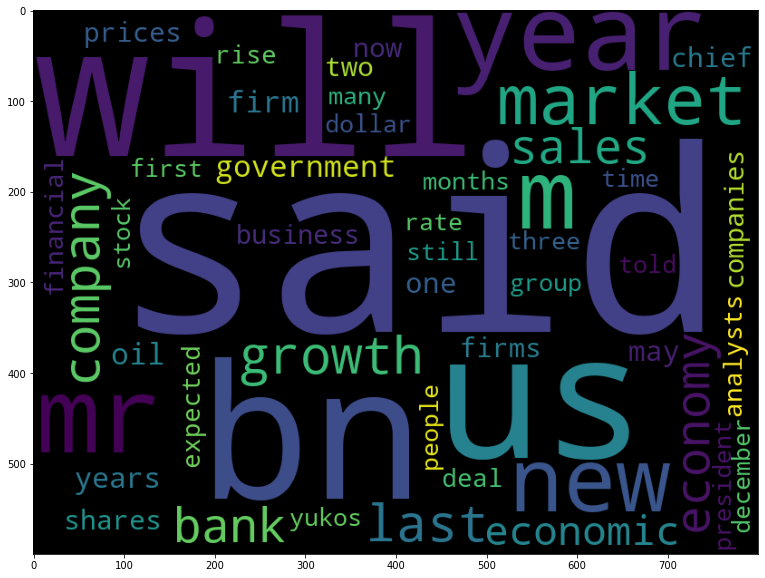

In [57]:
most_fre_words = {k:v for k,v in C.most_common(50)}
plt.figure(figsize = (15,10))
plt.imshow(wc.generate_from_frequencies(most_fre_words))